# Integration of analitics and visualization Topic

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Create the dataset

dataset = {
    "Age":np.random.randint(18,70,100),
    "Income":np.random.normal(4000,1500,95).astype(int),
    "Monthly_expense":np.random.normal(1500,700,96).astype(int)
}

dataset['Income'] = np.append(dataset['Income'], [15000, 20000, 30000, 50000, 100000])
dataset['Monthly_expense'] = np.append(dataset['Monthly_expense'], [10000, 12000, 15000, 20000])
dataset['Income']=np.sort(dataset['Income'])
dataset['Monthly_expense']=np.sort(dataset['Monthly_expense'])

df = pd.DataFrame(dataset)

print(df.head())

   Age  Income  Monthly_expense
0   35     596             -470
1   20    1042             -380
2   56    1863             -185
3   27    2116              265
4   19    2139              309


In [3]:
# Income Descriptive analytic
## central trend measures 
income_mean = df['Income'].mean()
income_median = df['Income'].median()
income_mode = df['Income'].mode()[0]
## dispersion measures
income_range = max(df['Income'])-min(df['Income'])
income_variance = df['Income'].var()
income_std_dev = df['Income'].std()
income_q1 = df['Income'].quantile(0.25)
income_q3 = df['Income'].quantile(0.75)


In [4]:
# Monthly_expense Descriptive analytic
## Central trend measures
monthly_expense_mean = df['Monthly_expense'].mean()
monthly_expense_median = df['Monthly_expense'].median()
monthly_expense_mode = df['Monthly_expense']
## dispersion measures
monthly_expense_range = max(df['Monthly_expense'])-min(df['Monthly_expense'])
monthly_expense_variance = df['Monthly_expense'].var()
monthly_expense_std_dev = df['Monthly_expense'].std()
monthly_expense_q1 = df['Monthly_expense'].quantile(0.25)
monthly_expense_q3 = df['Monthly_expense'].quantile(0.75)

In [5]:
# Outliers detections
## Income
### IQR method
income_IQR = income_q3-income_q1
income_bot_limit = income_q1-1.5*income_IQR
income_top_limit = income_q3+1.5*income_IQR
income_outliers_IQR = df[(df['Income']<income_bot_limit)|(df['Income']>income_top_limit)]
### Estandar deviation method
income_outliers_std_dev = df[(df['Income']<income_mean-3*income_std_dev)|(df['Income']>income_mean+3*income_std_dev)]
## Monthly_expense (ms)
### IQR method
ms_IQR = monthly_expense_q3-monthly_expense_q1
ms_bot_limit = monthly_expense_q1-1.5*ms_IQR
ms_top_limit = monthly_expense_q3+1.5*ms_IQR
ms_outliers_IQR = df[(df['Monthly_expense']<ms_bot_limit)|(df['Monthly_expense']>ms_top_limit)]
### Estandar deviation method
ms_outliers_std_dev = df[(df['Monthly_expense']<monthly_expense_mean-3*monthly_expense_std_dev)|(df['Monthly_expense']>monthly_expense_mean+3*monthly_expense_std_dev)]

Text(0, 0.5, 'Monthly Expense ($)')

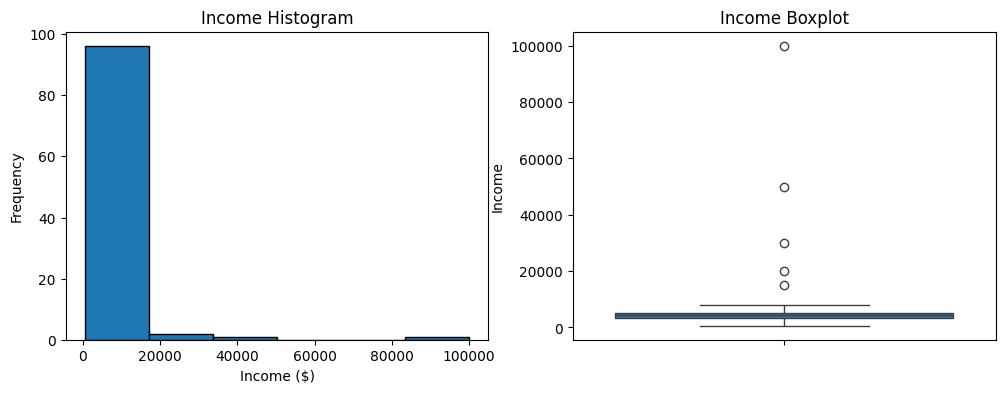

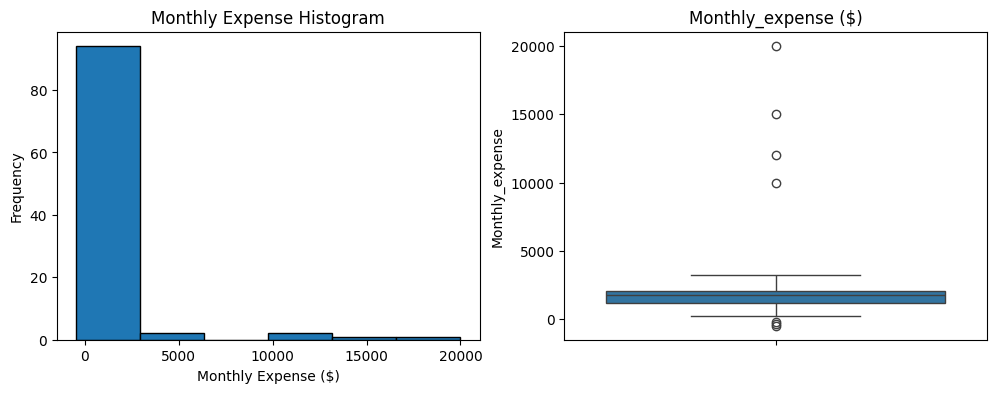

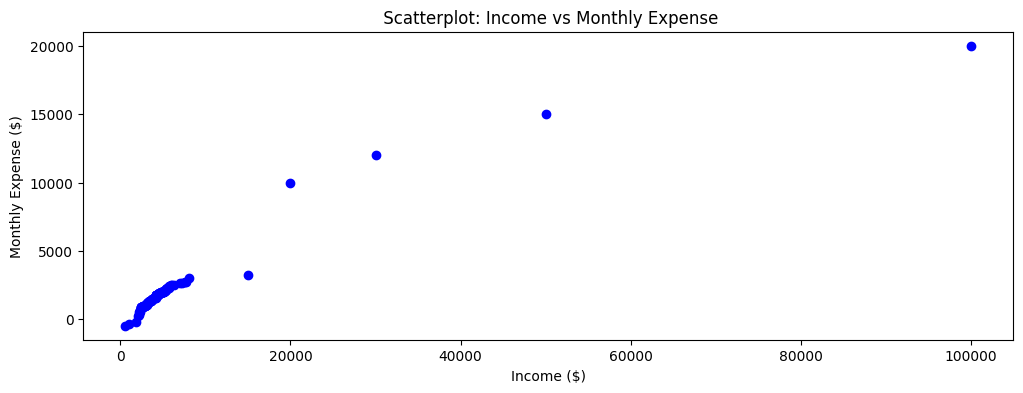

In [6]:
# Visualization
## Income
plt.figure(figsize=(12,4))
### histogram
plt.subplot(1,2,1)
plt.hist(df['Income'],bins=6,edgecolor="black")
plt.title("Income Histogram")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
### boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df['Income'])
plt.title("Income Boxplot")

## Monthly_expense
plt.figure(figsize=(12,4))
### histogram
plt.subplot(1,2,1)
plt.hist(df['Monthly_expense'],bins=6,edgecolor="black")
plt.title("Monthly Expense Histogram")
plt.xlabel("Monthly Expense ($)")
plt.ylabel("Frequency")
### boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df['Monthly_expense'])
plt.title("Monthly_expense ($)")

## Scatterplot - Income vs Monthly_expense
plt.figure(figsize=(12,4))
plt.scatter(df['Income'],df['Monthly_expense'],c="blue")
plt.title(" Scatterplot: Income vs Monthly Expense")
plt.xlabel("Income ($)")
plt.ylabel("Monthly Expense ($)")

In [8]:
# Interpretation
print(f"Mean: {income_mean}\n Median: {income_median}\n")
print("the data is not symetric because the mean and the median gap is big")
print(f"Income outliers:\n IQR:\n {income_outliers_IQR}\n standar deviation:\n {income_outliers_std_dev}")
print(f"Monthly_expense outliers:\n IQR:\n {ms_outliers_IQR}\n standar deviation:\n {ms_outliers_std_dev}")
print(f"there are outliers, they are high-value costumer")
print("yes, there are relation between Income and Monthly_expense")

Mean: 6130.76
 Median: 4291.0

the data is not symetric because the mean and the median gap is big
Income outliers:
 IQR:
     Age  Income  Monthly_expense
95   42   15000             3255
96   26   20000            10000
97   55   30000            12000
98   49   50000            15000
99   20  100000            20000
 standar deviation:
     Age  Income  Monthly_expense
98   49   50000            15000
99   20  100000            20000
Monthly_expense outliers:
 IQR:
     Age  Income  Monthly_expense
0    35     596             -470
1    20    1042             -380
2    56    1863             -185
96   26   20000            10000
97   55   30000            12000
98   49   50000            15000
99   20  100000            20000
 standar deviation:
     Age  Income  Monthly_expense
97   55   30000            12000
98   49   50000            15000
99   20  100000            20000
there are outliers, they are high-value costumer
yes, there are relation between Income and Monthly_expense
